# A6 Deutsch Josza

Learning objectives

1. Implement the Deutsch-Jozsa algorithm.
2. Compare the algorithmic performance of Deutsch-Jozsa to deterministic and classically random strategies.

Author: [Monit Sharma](https://github.com/MonitSharma)
LinkedIn: [Monit Sharma](https://www.linkedin.com/in/monitsharma/)
Twitter: [@MonitSharma1729](https://twitter.com/MonitSharma1729)
Medium : [MonitSharma](https://medium.com/@_monitsharma)

The result of applying the Hadamard-oracle-Hadamard circuit for a single solution is a probability distribution peaked at 0, whatever the secret combination. Although we can't use it to break the lock, perhaps we can determine some property of the solution set when there is more than one, just like the pair-testing circuit.

To see whether this is possible, let's implement the same Hadamard-oracle-Hadamard circuit, but now for multiple solutions:

![](https://codebook.xanadu.ai/pics/hadamard.svg)

Since 0 seemed to be the interesting state, we can plot how the probability of observing 0 changes with the number of solutions.

### Codercise A.6.1. 
Implement the circuit above for a set of solutions combos, and return probabilities. As before, you are given multisol_oracle_matrix(combos), which returns the associated oracle in matrix form.

Hitting submit will plot the probability of observing  as a function of the size of the solution set; as for a single solution, this does not depend on the secret combinations themselves. What pattern do you observe?

In [ ]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def multisol_hoh_circuit(combos):
    """A circuit which applies Hadamard, multi-solution oracle, then Hadamard.
    
    Args:
        combos (list[list[int]]): A list of secret bit strings.

    Returns: 
        array[float]: Probabilities for observing different outcomes.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_bits):
        qml.Hadamard(wires=i)
    
    qml.QubitUnitary(multisol_oracle_matrix(combos), wires = [i for i in range(n_bits)])
    for i in range(n_bits):
        qml.Hadamard(wires=i)

    return qml.probs(wires=range(n_bits))


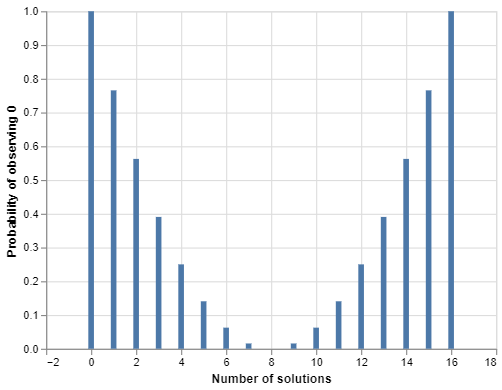

#### Codercise A.6.2. 
Implement the Deutsch-Jozsa algorithm. Given a constant or balanced function based on the `promise_var` flag, implement the circuit from above to determine which it is. The function `multisol_hoh_circuit` from the previous exercise is available for you to use.

In [ ]:
def deutsch_jozsa(promise_var):
    """Implement the Deutsch-Jozsa algorithm and guess the promise variable.
    
    Args:
        promise_var (int): Indicates whether the function is balanced (0) or constant (1).
        
    Returns: 
        int: A guess at the promise variable.
    """
    if promise_var == 0:
        how_many = 2**(n_bits - 1)
    else:
        how_many = np.random.choice([0, 2**n_bits]) # Choose all or nothing randomly
    combos = multisol_combo(n_bits, how_many) # Generate random combinations

    ##################
    # YOUR CODE HERE #
    ##################
    probs = multisol_hoh_circuit(combos)
    print(probs)
    if np.isclose(probs[0],1):
        return 1
    else:
        return 0

    pass
